In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt

data = xr.open_dataset("../data/delhi_cpcb_2022.nc")
# data = xr.open_dataset("delhi_cpcb_2022.nc")
data

<xarray.Dataset>
Dimensions:    (station: 40, time: 8783)
Coordinates:
  * station    (station) object 'Alipur, Delhi - DPCC' ... 'Wazirpur, Delhi -...
  * time       (time) datetime64[ns] 2022-01-01T00:30:00 ... 2023-01-01T22:23:30
    latitude   (station) float64 ...
    longitude  (station) float64 ...
Data variables: (12/21)
    From Date  (station, time) datetime64[ns] ...
    To Date    (station, time) datetime64[ns] ...
    PM2.5      (station, time) float64 ...
    PM10       (station, time) float64 ...
    NO         (station, time) float64 ...
    NO2        (station, time) float64 ...
    ...         ...
    WD         (station, time) float64 ...
    SR         (station, time) float64 ...
    BP         (station, time) float64 ...
    AT         (station, time) float64 ...
    RF         (station, time) float64 ...
    TOT-RF     (station, time) float64 ...

In [2]:
lat_list = [28.815329,28.647622,28.695381,28.4706914,28.7762,28.7256504,28.5512005,28.656756,28.7500499,28.498571,28.5710274,28.655935,28.5627763,28.6811736,28.628624,28.73282,28.58028,28.588333,28.5918245,28.611281,28.636429,28.684678,28.60909,28.570173,28.822836,28.56789,28.6573814,28.530785,28.623763,28.674045,28.639645,28.639645,28.563262,28.732528,28.6514781,28.5504249,28.710508,28.531346,28.672342,28.699793]

In [3]:
df = data.to_dataframe().reset_index()
df = df[df["time"]=="2022-03-01 01:30:00"]
df = df.dropna(subset=["PM2.5"])
df = df.rename(columns={"RH": "relative_humidity", "WS": "wind_speed", "WD": "wind_direction", "SR": "solar_radiation", "BP": "pressure", "AT": "temperature", "RF": "rain_fall", "TOT-RF": "total_rainfall"})

In [4]:
df.head()

,station,time,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,relative_humidity,wind_speed,wind_direction,solar_radiation,pressure,temperature,rain_fall,total_rainfall,latitude,longitude
1417,"Alipur, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,70.00,150.0,3.78,43.38,26.15,3.42,...,78.22,NaN,139.97,4.55,993.40,11.43,0.0,0.0,28.815329,77.153010
10200,"Anand Vihar, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,52.50,144.0,11.88,30.62,26.02,15.82,...,68.95,0.30,246.25,8.95,973.65,15.45,NaN,0.0,28.647622,77.315809
18983,"Ashok Vihar, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,79.00,134.0,7.47,67.17,41.80,50.77,...,71.30,0.38,206.90,5.43,987.17,13.82,0.0,0.0,28.695381,77.181665
27766,"Aya Nagar, Delhi - IMD",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,73.94,159.3,22.49,26.28,48.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
36549,"Bawana, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,135.00,245.0,4.80,20.65,25.43,41.45,...,81.62,0.62,22.33,5.70,993.12,12.30,0.0,0.0,28.776200,77.051074


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['station'] = le.fit_transform(df['station'])

In [6]:
station = {}
lat = []
long = []
for i in df.station.unique():
    lat_i = df[df['station'] == i]['latitude'].item()
    long_i = df[df['station'] == i]['longitude'].item()
    pm_i = df[df['station'] == i]['PM2.5'].item()
    
    station[i] = [lat_i, long_i, pm_i]
    long.append(long_i)
    lat.append(lat_i)

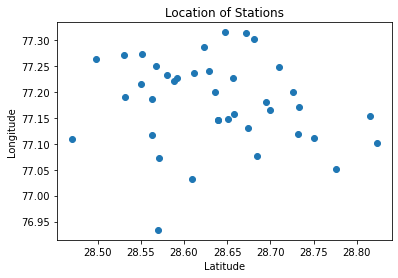

In [7]:
plt.scatter(y = long, x = lat)
plt.title('Location of Stations')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

In [8]:
import math

def get_distance(lat1, lon1, lat2, lon2):
    # Calculate the distance between the coordinates using the Haversine formula
    radius = 6371  # Earth's radius in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c
    return distance

distances = []
for i in station.keys():
    temp = []
    for j in station.keys():
        if i==j:
            continue
        else:
            temp.append([get_distance(station[i][0], station[i][1], station[j][0], station[j][1]), j])
    distances.append(temp)


In [9]:
for i in range(len(distances)):
    distances[i].sort()

In [10]:
import networkx as nx

no_of_neighbours = 8

G = nx.Graph()

for i in range(len(distances)):
    G.add_node(i, latitude = station[i][0], longitude = station[i][1], pm = station[i][2])
    
    for j in range(no_of_neighbours):
        s = distances[i][j][1]
        G.add_node(s, latitude = station[s][0], longitude = station[s][1], pm = station[s][2])
        G.add_edge(i, s)


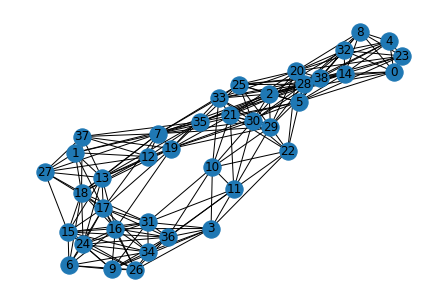

In [11]:
layout1 = nx.spring_layout(G, k=0.5)

# Draw the graph with the specified layout
plt.figure()  
nx.draw(G, pos=layout1, with_labels=True)
plt.show()

In [12]:
import folium
import networkx as nx
from folium.plugins import FastMarkerCluster

# Create a NetworkX graph (G) and calculate node positions (lat_lon_dict)
lat_lon_dict = {}
for node in G.nodes:
    lat_lon_dict[node] = (G.nodes[node]['latitude'], G.nodes[node]['longitude'])

# Create a Folium map centered on Delhi
m = folium.Map(location=[28.7041, 77.1025], zoom_start=10, tiles = 'cartodbpositron')

# Create a MarkerCluster layer for better performance
marker_cluster = FastMarkerCluster(data=list(lat_lon_dict.values()))
m.add_child(marker_cluster)

# Iterate over the edges and add them to the map as lines
for u, v in G.edges:
    lat1, lon1 = lat_lon_dict[u]
    lat2, lon2 = lat_lon_dict[v]
    folium.PolyLine([(lat1, lon1), (lat2, lon2)], color='gray', weight=1).add_to(m)

# Iterate over the nodes and add them to the map as markers
for node, (lat, lon) in lat_lon_dict.items():
    folium.CircleMarker(location=(lat, lon), radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

# Display the map
m

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset
from torch_geometric.nn import GCNConv

node_features = [(G.nodes[node]['latitude'], G.nodes[node]['longitude']) for node in G.nodes]
edge_index = torch.tensor(list(G.edges)).t().contiguous()
y = torch.tensor([G.nodes[node]['pm'] for node in G.nodes], dtype=torch.float).view(-1, 1)
sorted_nodes = sorted(G.nodes(), key=lambda node: G.nodes[node]['latitude'])

# Divide train and test masks based on the sorted latitudes
train_mask = torch.zeros(y.size(0), dtype=torch.bool)
test_mask = torch.zeros(y.size(0), dtype=torch.bool)

for i, node in enumerate(G.nodes):
    lat = G.nodes[node]['latitude']
    if lat in lat_list[:25]:
        train_mask[i] = True
    else:
        test_mask[i] = True


data1 = Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index, y=y,train_mask=train_mask, test_mask=test_mask)

In [14]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.conv1 = GCNConv(input_dim, 16)
        self.conv2 = GCNConv(16, 10)
        self.linear1 = nn.Linear(10, 10)
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x


In [15]:
import random
seed = 42
random.seed(seed)
torch.manual_seed(seed)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = RegressionModel(input_dim=2).to(device)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [16]:
train_rmse_list1 = []
test_rmse_list1 = []

from tqdm import tqdm

#Training Loop for G1
for epoch in tqdm(range(2500)):
    optimizer.zero_grad()
    out = model1(data1.x.to(device), data1.edge_index.to(device))
    loss = criterion(out[data1.train_mask].squeeze(), data1.y[data1.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%100==0):
        model1.eval()
        with torch.no_grad():
            out = model1(data1.x.to(device), data1.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data1.train_mask].squeeze() - data1.y[data1.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data1.test_mask].squeeze() - data1.y[data1.test_mask].squeeze())**2))
            train_rmse_list1.append(train_rmse.item())
            test_rmse_list1.append(test_rmse.item())
        model1.train()

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:05<00:00, 474.45it/s]


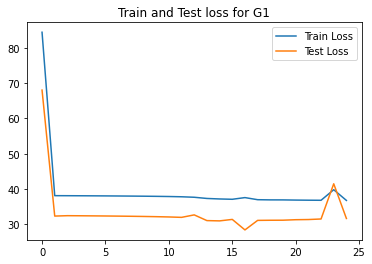

In [17]:
# Assuming you have train_loss_list and test_loss_list as lists containing the respective losses

# Plotting train loss
plt.plot(range(len(train_rmse_list1)), train_rmse_list1, label='Train Loss')

# Plotting test loss
plt.plot(range(len(test_rmse_list1)), test_rmse_list1, label='Test Loss')
plt.title("Train and Test loss for G1")
plt.legend()
plt.show()

In [18]:
model1.eval()
with torch.no_grad():
    out = model1(data1.x.to(device), data1.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data1.train_mask].squeeze() - data1.y[data1.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data1.test_mask].squeeze() - data1.y[data1.test_mask].squeeze())**2))
    print("G1")
    print(f"GNN train rmse:{train_rmse}")
    print(f"GNN test rmse: {test_rmse}")

G1
GNN train rmse:36.724365234375
GNN test rmse: 31.72980308532715


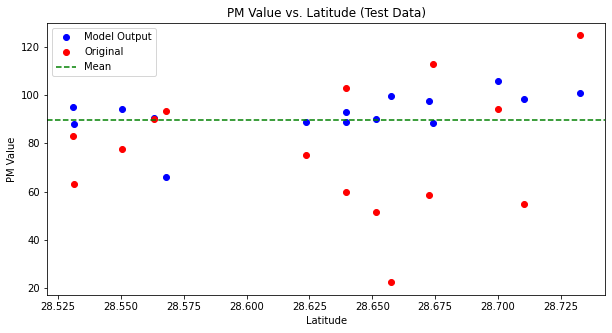

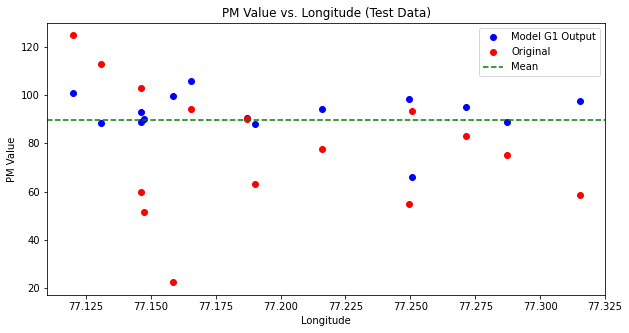

In [19]:
with torch.no_grad():
    out_test1 = model1(data1.x.to(device), data1.edge_index.to(device))[data1.test_mask].squeeze()
y_test = data1.y[data1.test_mask].squeeze().cpu().numpy()

# with torch.no_grad():
#     out_test2 = model2(data2.x.to(device), data2.edge_index.to(device))[data2.test_mask].squeeze()

# Get the latitude and longitude for test data
lat_test = data1.x[data1.test_mask][:, 0].cpu().numpy()
lon_test = data1.x[data1.test_mask][:, 1].cpu().numpy()
train_mean = torch.mean(data1.y[data1.train_mask])

# Plot the model output against latitude
plt.figure(figsize=(10, 5))
plt.scatter(lat_test, out_test1.cpu().numpy(), c='b', label='Model Output')
plt.scatter(lat_test, y_test, c='r', label='Original')
plt.axhline(train_mean, c='g', linestyle='--', label='Mean')
plt.xlabel('Latitude')
plt.ylabel('PM Value')
plt.title('PM Value vs. Latitude (Test Data)')
plt.legend()
plt.show()

# Plot the model output against longitude
plt.figure(figsize=(10, 5))
plt.scatter(lon_test, out_test1.cpu().numpy(), c='b', label='Model G1 Output')
plt.scatter(lon_test, y_test, c='r', label='Original')
plt.axhline(train_mean, c='g', linestyle='--', label='Mean')
plt.xlabel('Longitude')
plt.ylabel('PM Value')
plt.title('PM Value vs. Longitude (Test Data)')
plt.legend()
plt.show()